# 0312017068 佐々木仁也

# 課題4: 必修：1),2), 選択:3)
# 1)迷路の問題を解けるとき、sからtまでの経路を求める。幅優先探索による解と深さ優先探索の解を求めよ。 その時の探索木OpenList,ClosedListのステップごとに示す。
# 2)グラフ１について、A(スタート)、L(ゴール)の時、均一コスト探索の解を求めよ(networkxライブラリを用いて計算を行う)
# 3)双方向探索の幅優先探索による、グラフ探索プログラムを作成する。グラフ１について、A(スタート)、L(ゴール)の時、実行結果をす。双方向探索は初期状態から前向きに、そしてゴールから後ろ向きにと同時に探索して、中央で二つの探索が出会うときに止まるというものである。このアルゴリズムの終了条件は Aノードが両方の探索の訪問されたリストにある。

# 課題１:迷路の問題を解けるとき、sからtまでの経路を求める。幅優先探索による解と深さ優先探索の解を求めよ。 その時の探索木OpenList,ClosedListのステップごとに示す。

In [1]:
def BFS(graph,start,end):
    C = [] #olistを空にする
    O = [] #clistを空にする
    initPath = [start] #startをinitPathに入れる
    O.append(start) #それをOに入れる
    pathQueue = [initPath]
    while len(O) != 0: #openlistが空になるまで続ける
        A = O.pop(0) #oの先頭をpopする
        tmpPath = pathQueue.pop(0) #経路を記録する
        if A == end: #Aがゴールならば、Sからゴールに至る節点のｔｍｐPathを返す
            print("Goal! BFS Search is over!")
            return tmpPath
        else: #Aがゴールでなければ、Aを展開し到達可能な節点のtmppathを求める
            P_A = graph[A]
            if A not in C:
                C.append(A) #AをClosedListの最後に入れる
            if P_A == []: #P_Aが空ならばnoneを返す
                print("NO Solution. Path empty.")
                return None
            for node in P_A:
                if node not in O and node not in C:
                    O.append(node)
                    newPath = tmpPath + [node]
                    pathQueue.append(newPath)
    return none

In [2]:
g2 = {'A':{'D','C'},'B':{'A','D'},'C':{'D','E'},'D':{'E'}}

In [3]:
g3 = {'S':{'1','6','8'},'1':{'S','2','3'},'2':{'1'},'3':{'1','4'},
      '4':{'5'},'5':{'4','6','9'},'6':{'S','5','7'},
      '7':{'6','8','9'},'8':{'S','7'},'9':{'T'},'T':{'9'}}

In [4]:
print("BFS for graph2:")
print(BFS(g2,"B","E"))

BFS for graph2:
Goal! BFS Search is over!
['B', 'D', 'E']


In [5]:
g3

{'S': {'1', '6', '8'},
 '1': {'2', '3', 'S'},
 '2': {'1'},
 '3': {'1', '4'},
 '4': {'5'},
 '5': {'4', '6', '9'},
 '6': {'5', '7', 'S'},
 '7': {'6', '8', '9'},
 '8': {'7', 'S'},
 '9': {'T'},
 'T': {'9'}}

In [6]:
print("BFS for graph2:")
print(BFS(g3,"S","T"))

BFS for graph2:
Goal! BFS Search is over!
['S', '8', '7', '9', 'T']


In [7]:
def DFS(graph,start,end):
    C = []
    O = []
    initPath = [start]
    O.append(start)
    pathQueue = [initPath]
    while len(O) != 0:
        A = O.pop(0)
        tmpPath = pathQueue.pop(0)
        if A == end:
            print("Goal! DFS Search is over!")
            print(tmpPath)
            return tmpPath
        else:
            P_A = graph[A]
            if A not in C:
                C.append(A)
            if P_A != []:
                for node in P_A:
                    if node not in O and node not in C:
                        O.append(node)
                        O.reverse()
                        newPath = tmpPath + [node]
                        pathStack.append(newPath)
                        pathStackreverse()
    return none

# 課題２：グラフ１について、A(スタート)、L(ゴール)の時、均一コスト探索の解を求めよ(networkxライブラリを用いて計算を行う)

In [8]:
import networkx as nx
%matplotlib inline

In [9]:
L={'A':{'B':3,'C':2,'E':9},'B':{'D':2,'E':4},'C':{'E':6,'F':9},
   'D':{'G':3},'E':{'G':1,'H':2},'F':{'H':1,'I':2},'G':{'J':5},
   'H':{'J':5,'L':9,'K':6},'I':{'K':2},'J':{'L':5},'K':{'L':3}}

In [10]:
L

{'A': {'B': 3, 'C': 2, 'E': 9},
 'B': {'D': 2, 'E': 4},
 'C': {'E': 6, 'F': 9},
 'D': {'G': 3},
 'E': {'G': 1, 'H': 2},
 'F': {'H': 1, 'I': 2},
 'G': {'J': 5},
 'H': {'J': 5, 'L': 9, 'K': 6},
 'I': {'K': 2},
 'J': {'L': 5},
 'K': {'L': 3}}

In [11]:
wg = nx.DiGraph(directed=True)

In [12]:
wg.add_edges_from([('A','B')],weight=3)
wg.add_edges_from([('A','C')],weight=2)
wg.add_edges_from([('A','E')],weight=9)
wg.add_edges_from([('B','D')],weight=2)
wg.add_edges_from([('B','E')],weight=4)
wg.add_edges_from([('C','E')],weight=6)
wg.add_edges_from([('C','F')],weight=9)
wg.add_edges_from([('D','B')],weight=3)
wg.add_edges_from([('E','C')],weight=2)
wg.add_edges_from([('E','E')],weight=9)
wg.add_edges_from([('F','D')],weight=2)
wg.add_edges_from([('F','E')],weight=4)
wg.add_edges_from([('G','E')],weight=6)
wg.add_edges_from([('H','F')],weight=9)

In [13]:
edge_labels=dict([((u,v,),d['weight'])
                  for u,v,d in wg.edges(data=True)])

In [14]:
 options = {
     'node_color': 'yellow',
     'node_size': 500,
     'width': 3
 }

C:\home\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\home\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


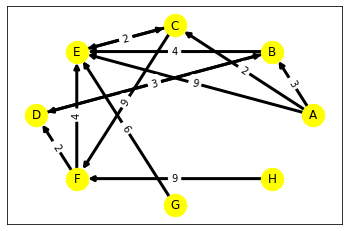

In [15]:
pos=nx.circular_layout(wg)
nx.draw_networkx_edge_labels(wg,pos,edge_labels=edge_labels, **options)
nx.draw_networkx(wg, pos, **options)